# Sentiment Scoring using Textblob

In [1]:
# pip install -U textblob-de
# python -m textblob.download_corpora
from textblob_de import TextBlobDE as TextBlob
import pandas as pd

#### Load Data

In [2]:
yelp = pd.read_csv('cleaned_data_yelp.csv')
yelp.head()

,Comment,Rating,Clean_Comment,Tokenized_Comment,Lemmatized_Comment
0,ich habe mir bewertungen zu restaurants auf ...,5,ich habe mir bewertungen zu restaurants auf ...,bewertungen restaurants menulist angesehen res...,ich haben sich bewertung zu restaurant auf...
1,das joseph ist ein ziemlich neues israelische...,4,das joseph ist ein ziemlich neues israelische...,joseph ziemlich neues israelisches restaurant ...,der joseph sein ein ziemlich neu israelisch ...
2,schalömchen scheiße haben wir uns heute kosche...,5,schalömchen scheiße haben wir uns heute kosche...,schalömchen scheiße heute koscher weggeknallt ...,schalömch scheiße haben wir sich heute kosch w...
3,essen war allenfalls ok muss ich nicht nochmal...,2,essen war allenfalls ok muss ich nicht nochmal...,essen allenfalls ok nochmal insgesamt erlebnis...,essen sein allenfalls ok mussen ich nicht noch...
4,waren auf empfehlung dort und wurden nicht en...,5,waren auf empfehlung dort und wurden nicht en...,empfehlung wurden enttäuscht hammer ambiente h...,sein auf empfehlung dort und werden nicht en...


#### Compute sentiment score per comment

In [3]:
def compute_sentiscore(text):
    blob=TextBlob(text)
    polarity = blob.sentiment.polarity
    return polarity
yelp['Senti_Blob'] = yelp['Lemmatized_Comment'].apply(lambda x: compute_sentiscore(x))

#### Scale Sentiblob to Rating Range 1-5

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,5))
# Create Array with specific dimension requirements to make scaler happy
senti_blob_ar= (yelp['Senti_Blob'].values).reshape(-1, 1)
Senti_Blob_scaled = pd.DataFrame(scaler.fit_transform(senti_blob_ar),columns=['Senti_norm'])
senti_blob = pd.DataFrame(yelp['Senti_Blob'])
yelp = pd.concat([yelp,Senti_Blob_scaled],axis=1)


#### Comparison Rating vs. TextBlob Sentiscore

<AxesSubplot: ylabel='Frequency'>

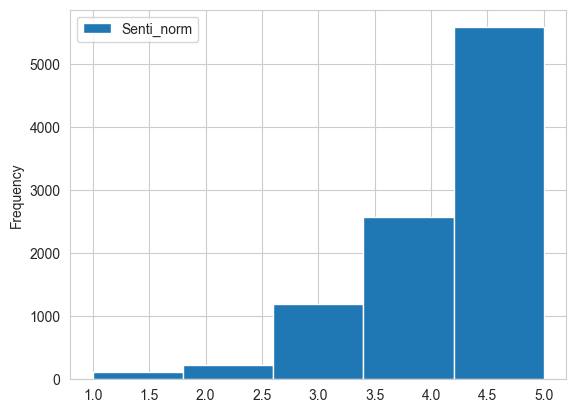

In [8]:
Senti_Blob_scaled.plot.hist(grid=True, bins=5)


<AxesSubplot: ylabel='Frequency'>

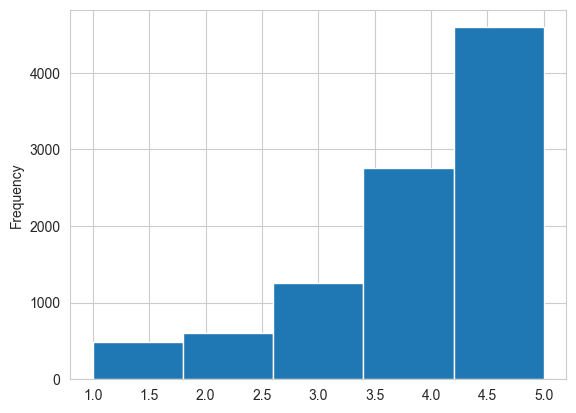

In [6]:
yelp['Rating'].plot.hist(grid=True, bins=5)

In [7]:
yelp.to_csv('yelp_cleaned_sentiscored.csv',header=True, index=False)